In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Actor detection/

/gdrive/MyDrive/Actor detection


In [4]:
ls

others/  rajeshDai/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Actor detection",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 200 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['others', 'rajeshDai']

In [10]:
len(dataset)

4

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[ 94.       145.       164.      ]
  [ 94.       145.       164.      ]
  [ 94.00231  145.00232  164.00232 ]
  ...
  [ 91.39453  141.39453  164.39453 ]
  [ 91.       141.       164.      ]
  [ 91.       141.       164.      ]]

 [[ 94.01758  145.01758  164.01758 ]
  [ 94.01758  145.01758  164.01758 ]
  [ 94.405174 145.40518  164.40518 ]
  ...
  [ 91.39453  141.39453  164.39453 ]
  [ 91.       141.       164.      ]
  [ 91.       141.       164.      ]]

 [[ 95.       146.       165.      ]
  [ 95.       146.       165.      ]
  [ 95.       146.       165.      ]
  ...
  [ 91.39453  141.39453  164.39453 ]
  [ 91.       141.       164.      ]
  [ 91.       141.       164.      ]]

 ...

 [[ 91.0293   141.0293   164.0293  ]
  [ 91.0293   141.0293   164.0293  ]
  [ 91.0293   141.0293   164.0293  ]
  ...
  [ 90.92581  138.02055  159.46213 ]
  [ 90.902145 143.30469  164.35263 ]
  [ 89.0293   143.9414   164.9707  ]]

 [[ 91.       141.       164.      ]
  [ 91. 

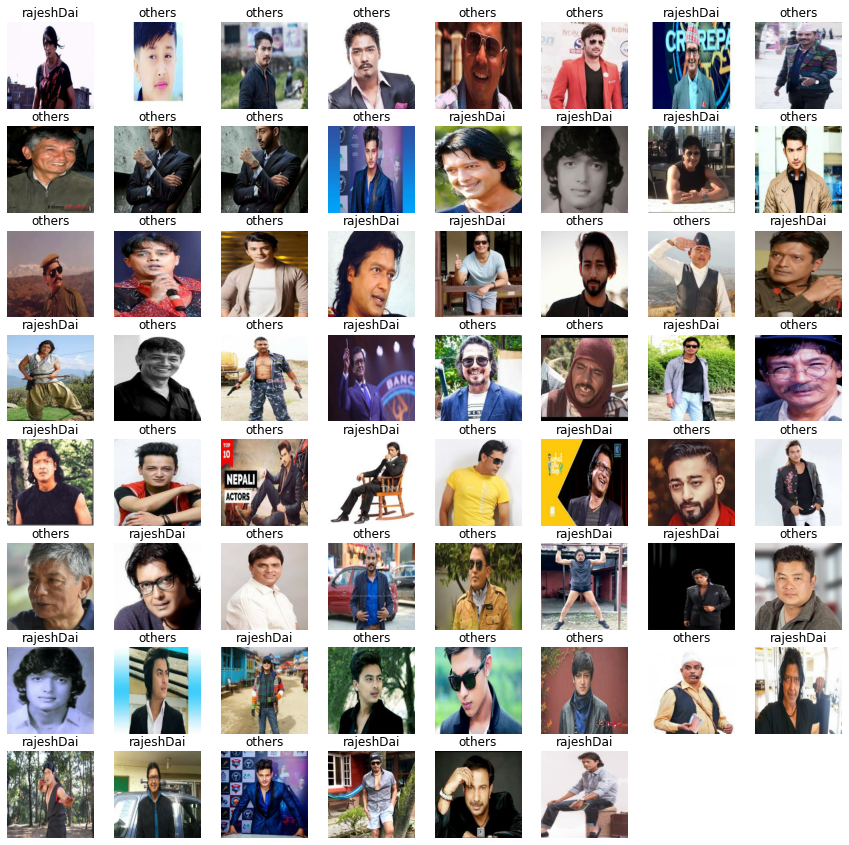

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [29]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
3/3 [==============================] - 27s 12s/step - loss: 0.6000 - accuracy: 0.6812
Epoch 2/20
3/3 [==============================] - 17s 7s/step - loss: 0.6043 - accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 15s 7s/step - loss: 0.5535 - accuracy: 0.7246
Epoch 4/20
3/3 [==============================] - 15s 7s/step - loss: 0.5593 - accuracy: 0.7101
Epoch 5/20
3/3 [==============================] - 15s 7s/step - loss: 0.5223 - accuracy: 0.7101
Epoch 6/20
3/3 [==============================] - 15s 7s/step - loss: 0.4833 - accuracy: 0.7464
Epoch 7/20
3/3 [==============================] - 20s 9s/step - loss: 0.4316 - accuracy: 0.7536
Epoch 8/20
3/3 [==============================] - 15s 7s/step - loss: 0.3870 - accuracy: 0.8261
Epoch 9/20
3/3 [==============================] - 15s 4s/step - loss: 0.3438 - accuracy: 0.8261
Epoch 10/20
3/3 [==============================] - 15s 4s/step - loss: 0.5239 - accuracy: 0.7681
Epoch 11/20
3/3 [=====================

In [30]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 1.2034 - accuracy: 0.8548


[1.203374981880188, 0.8548387289047241]

In [31]:
acc = history.history['accuracy']
loss = history.history['loss']

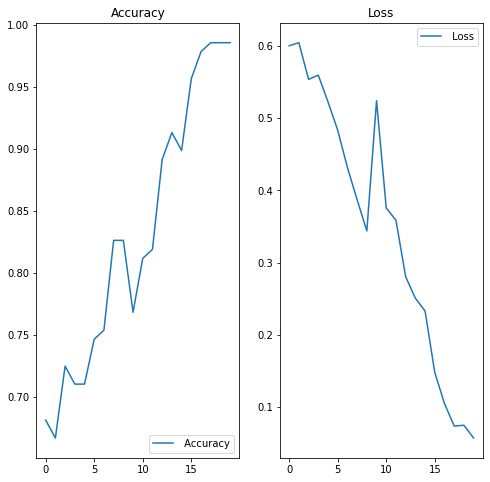

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

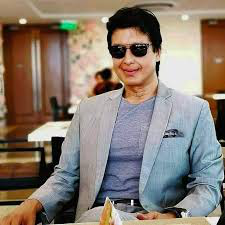

In [33]:
image_path = "/gdrive/My Drive/98.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [34]:
pred = model.predict(scaled_img)

In [35]:
output = class_names[np.argmax(pred)]

In [36]:
output

'rajeshDai'

In [37]:
model.save("Actor detection.h5")